# Faculty_Notebook - Day02

## Types of clustering :-
## Introduction
- As the name itself suggests, Clustering algorithms group a set of data points into subsets or clusters.
- The algorithms' goal is to create clusters that are coherent internally, but clearly different from each other externally.
- In other words, entities within a cluster should be as similar as possible and entities in one cluster should be as dissimilar as possible from entities in another.
- Broadly speaking there are `two ways of clustering data points based on the algorithmic structure and operation`, namely `agglomerative` and `divisive`. 
- **Agglomerative** : An agglomerative approach begins with each observation in a distinct (singleton) cluster, and successively merges clusters together until a stopping criterion is satisfied.
- **Divisive** : A divisive method begins with all patterns in a single cluster and performs splitting until a stopping criterion is met.
- **agglomerative** or `bottom-up approach`, where you start with each data point as its own cluster and then combine clusters based on some similarity measure. The idea can be easily adapted for divisive methods as well.


## Measures of distance (similarity)
- The similarity between the clusters is often calculated from the dissimilarity measures like the euclidean distance between two clusters. So the larger the distance between two clusters, the better it is.
- There are many distance metrics that you can consider to calculate the dissimilarity measure, and the choice depends on the type of data in the dataset. 
- For example 
  - if you have continuous numerical values in your dataset you can use `euclidean distance`, 
  - if the data is binary you may consider the `Jaccard distance` (helpful when you are dealing with categorical data for clustering after you have applied one-hot encoding). 
  - Other distance measures include `Manhattan, Minkowski, Canberra etc`.
- The choice of distance metric should be made based on theoretical concerns from the domain of study.
- That is, a distance metric needs to define similarity in a way that is sensible for the field of study.
- For example, if clustering crime sites in a city, city block distance may be appropriate (or, better yet, the time taken to travel between each location). 
- Where there is no theoretical justification for an alternative, the Euclidean should generally be preferred, as it is usually the appropriate measure of distance in the physical world.

- Agglomerative clustering is a hierarchical cluster technique that builds nested clusters with a bottom-up approach where each data point starts in its own cluster and as we move up, the clusters are merged, based on a distance matrix.

- The key operation in hierarchical agglomerative clustering is to repeatedly combine the two nearest clusters into a larger cluster. 

### Algorithm for bottom-up (Agglomerative clustering)

1. It starts by calculating the distance between every pair of observation points and store it in a distance matrix.
2. It then puts every point in its own cluster.
3. Then it starts merging the closest pairs of points based on the distances from the distance matrix and as a result the amount of clusters goes down by 1.
4. Then it recomputes the distance between the new cluster and the old ones and stores them in a new distance matrix.
5. Lastly it repeats steps 2 and 3 until all the clusters are merged into one single cluster.

### Inter-cluster linkage methods for merging clusters

- There are several ways to measure the distance between clusters in order to decide the rules for clustering,
- and they are often called **Linkage Methods**.
- Some of the common linkage methods are:
  - `Complete-linkage`: calculates the maximum distance between clusters before merging.
  - `Single-linkage`: calculates the minimum distance between the clusters before merging. This linkage may be used to detect high values in your dataset which may be outliers as they will be merged at the end.
  - `Average-linkage`: calculates the average distance between clusters before merging.
  - `Centroid-linkage`: finds centroid of cluster 1 and centroid of cluster 2, and then calculates the distance between the two before merging.
- The choice of linkage method entirely depends on you and there is no hard and fast method that will always give you good results. Different linkage methods lead to different clusters. 

- After selecting a distance metric, it is necessary to determine from where distance is computed.
- For example, it can be computed between the two most similar parts of a cluster `(single-linkage)`,
- the two least similar bits of a cluster `(complete-linkage)`,
- the center of the clusters `(mean or average-linkage)`, 
- or some other criterion. Many linkage criteria have been developed.

- As with distance metrics, the choice of linkage criteria should be made based on theoretical considerations from the domain of application.
- A key theoretical issue is what causes variation.
- For example, in archeology, we expect variation to occur through innovation and natural resources, so working out if two groups of artifacts are similar may make sense based on identifying the most similar members of the cluster.

- Where there are no clear theoretical justifications for choice of linkage criteria, `Ward’s method` is the sensible default.
- This method works out which observations to group based on reducing the sum of squared distances of each observation from the average observation in a cluster. 
- This is often appropriate as this concept of distance matches the standard assumptions of how to compute differences between groups in statistics (e.g., ANOVA, MANOVA).

**The main output of Hierarchical Clustering is a `dendrogram`, which shows the hierarchical relationship between the clusters**

### Dendrograms
- A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts
- In hierarchical clustering, you categorize the objects into a hierarchy similar to a tree-like diagram which is called a dendrogram. 
-  once one large cluster is formed by the combination of small clusters, dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points

### Cophenetic coefficient and its importance in quality of the dendogram

- Given the large number of techniques, it is often difficult to decide which is best.
- One criterion that has become popular is to use the result that has largest `cophenetic correlation coefficient`.
- This is the correlation between the original distances and those that result from the cluster configuration. 
- Values above 0.75 are felt to be good. 
- The Group Average method appears to produce high values of this statistic. This may be one reason that it is so popular.
- This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. 
- The closer the value is to 1, the better the clustering preserves the original distances,

# Refer to this link - http://archive.ics.uci.edu/ml/datasets/seeds and read the description of the dataset


Data has three different varieties of grains:

To construct the data, seven geometric parameters (features) of grains were measured:

* area A,
* perimeter P,
* compactness C = 4*pi*A/P^2,
* length of kernel,
* width of kernel,
* asymmetry coefficient
* length of kernel groove.
* target (abba, massa , indian)

In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")






**EDA:**

In [2]:
data = pd.read_csv('grains.csv')
data.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,target
112,19.13,16.31,0.9035,6.183,3.902,2.109,5.924,1
164,11.14,12.79,0.8558,5.011,2.794,6.388,5.049,2
10,15.26,14.85,0.8696,5.714,3.242,4.543,5.314,0
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


Let's see our data's information:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


- We have 210 rows and 8 columns. There aren't consist of any NaN(null) values so we don't have to manipulate/impute the missing values.
- There is a column called target, That is our grain's classification. Later I will exclude it from the data 

In [4]:
data.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


**Let's check the correlations between the features :**

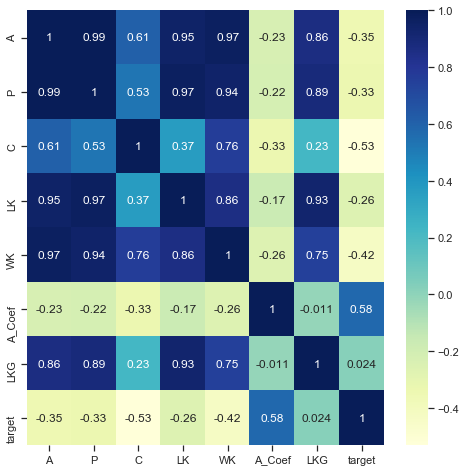

In [5]:
plt.figure(figsize=[8,8])
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


Let's see how many target classes we have in our data:

In [6]:
data['target'].value_counts()

2    70
1    70
0    70
Name: target, dtype: int64

**So, we have equally separeted 70 x 3 classes of grain's in our data.**

**Let's visualize all the features using a pairplot:**

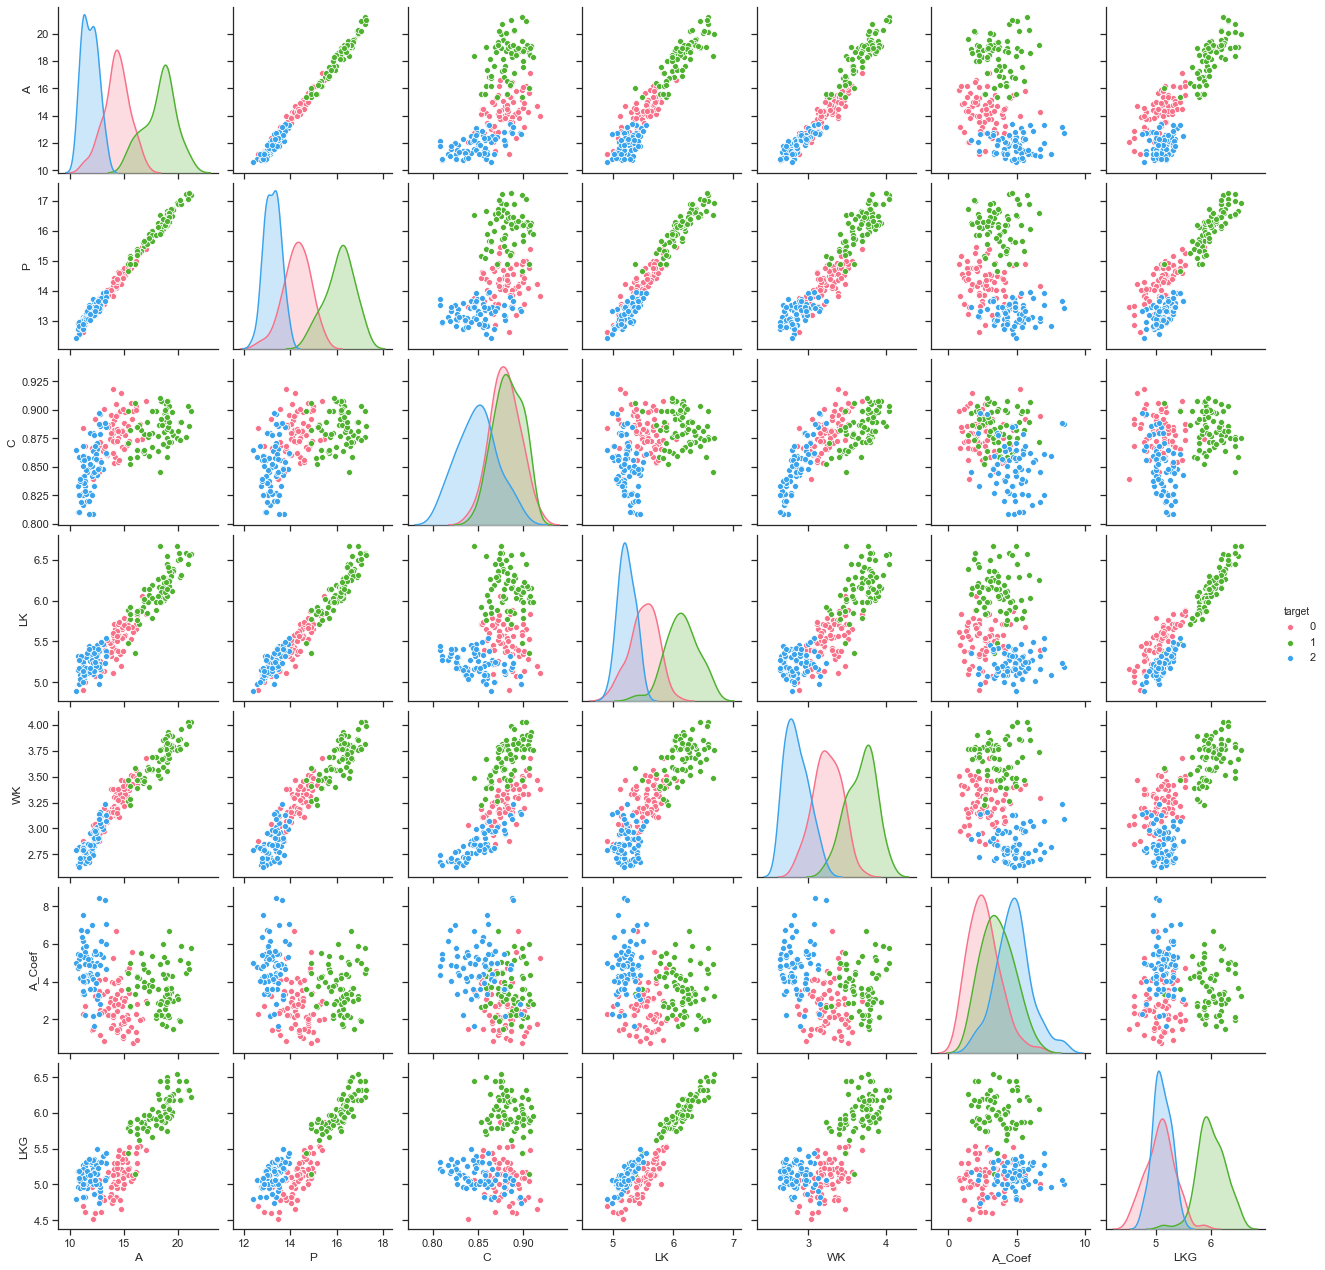

In [7]:
i = sns.pairplot(data, vars = ['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG'] ,hue='target', palette='husl')
plt.show()

**We can easily see the three target classes from our pairplot above.**

**Now we are going to visualize each feature. But in order to see the differences between the classes, we are going to show three boxplots for each feature. Each boxplot will show us the corresponding target class' values.**

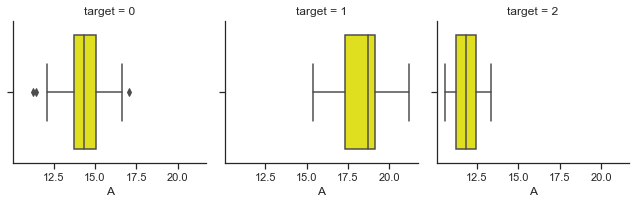

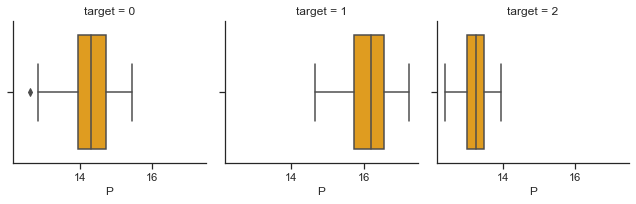

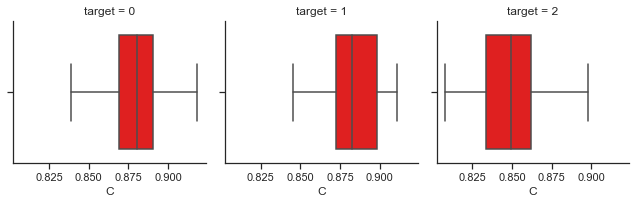

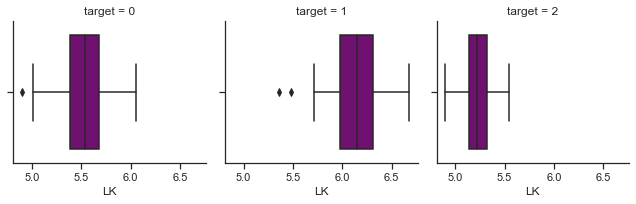

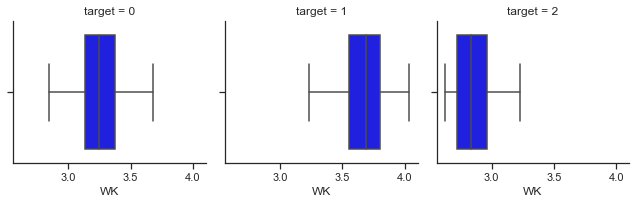

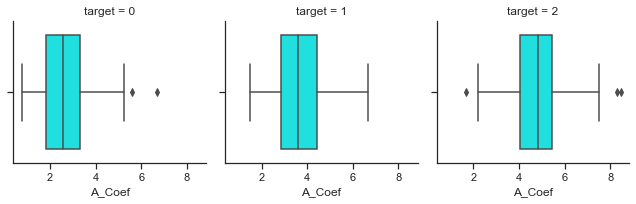

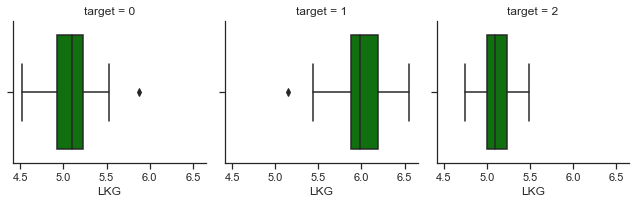

In [8]:
a = sns.FacetGrid(data, col='target')
a.map(sns.boxplot, 'A', color='yellow', order=['0', '1', '2'])

p = sns.FacetGrid(data, col='target')
p.map(sns.boxplot, 'P', color='orange', order=['0', '1', '2'])

c = sns.FacetGrid(data, col='target')
c.map(sns.boxplot, 'C', color='red', order=['0', '1', '2'])

lk = sns.FacetGrid(data, col='target')
lk.map(sns.boxplot, 'LK', color='purple', order=['0', '1', '2'])

wk = sns.FacetGrid(data, col='target')
wk.map(sns.boxplot, 'WK', color='blue', order=['0', '1', '2'])

acoef = sns.FacetGrid(data, col='target')
acoef.map(sns.boxplot, 'A_Coef', color='cyan', order=['0', '1', '2'])

lkg = sns.FacetGrid(data, col='target')
lkg.map(sns.boxplot, 'LKG', color='green', order=['0', '1', '2'])

**As an example: from the graph above, we have three boxplots showing LKG feature values according to three classes.** 
* If our  grain has a LKG value around 4.9-5.2 it belongs to target 0, 
* If it's around 5.9-6.2 it belongs to target 1, 
* And finally if it's around 5.0-5.3 it belongs to target 2.

**CREATING THE DATA SET:**

In [9]:
# Excluding target feature and create a new dataset:
df = data.iloc[:,0:7]
df.head(3)

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825


Now we are going to build our machine learning clustering models. 

we will be using two methods; **k-means clustering** and **hierarchical clustering/Agglomerative clustering** algorithms.

For k-means clustering algorithm:

* First of all I will find the best k value.
* Than I will use this k value to create a k-means model.
* And I will compare my original and k-means clustered datas.

For hierarchical clustering algorithm:

* First I will apply a dendrogram in order to find how many classes do I have in my data.
* Than I will use this class number to apply a hierarchical clustering algorithm.
* Lastly I will compare my original, k-means and hierarchical clustered datas.


**K-MEANS CLUSTERING ALGORITHM:**

**Finding the best K value:**

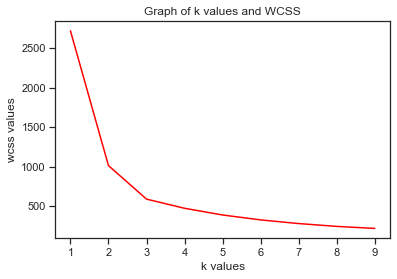

In [11]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

 According to the graph; it's elbow (where it bends) is the best k value for our K Means algorithm.In our it is 3

**K-Means Clustering Algorithm:**

In [12]:
# Now we know our best k value is 3, I am creating a new kmeans model:
kmeans2 = KMeans(n_clusters=3)

# Training the model:
clusters = kmeans2.fit_predict(df)

# Adding a label feature with the predicted class values:
df_k = df.copy(deep=True)
df_k['label'] = clusters

In [14]:
df_k.head(40)

,A,P,C,LK,WK,A_Coef,LKG,label
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,2
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,2
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,2
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,2
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,2
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,2


**Comparing Original Classes and K-Means Algorithm Classes:**

For visualization I will use only two features (A and P) for the original and predicted datasets. Different classes will have seperate color and styles.

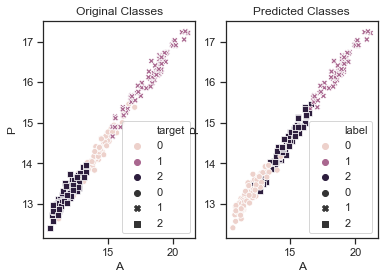

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1 = plt.subplot(1,2,1)
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data, ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_k, ax=ax2)
plt.show()

In [13]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
Predicted Data Classes:
0    77
2    72
1    61
Name: label, dtype: int64


**HIERARCHICAL CLUSTERING ALGORITHM:**

**Creating the Dendrogram:**

We use dendrogram to find how many classes we have in our data set.

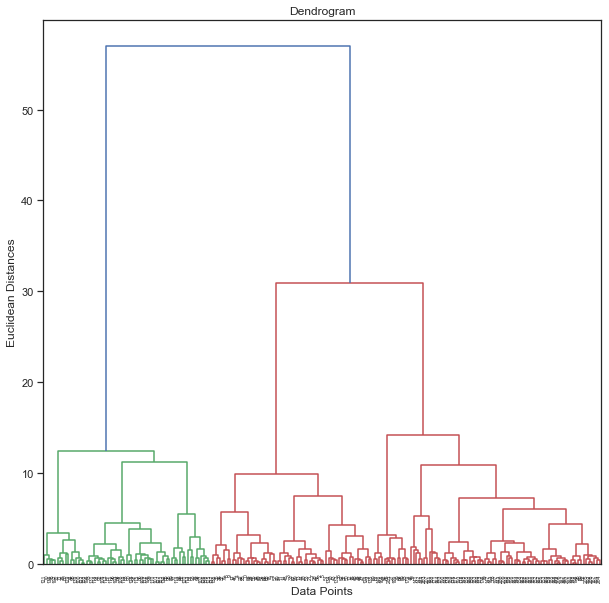

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=[10,10])
merg = linkage(df, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

**From the dendrogram we can read there are 3 classes in our data set.**

**Hierarchical Clustering Algorithm:**

In [15]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster2 = hie_clus.fit_predict(df)

df_h = df.copy(deep=True)
df_h['label'] = cluster2

**Comparing Original, K-Means and Hierarchical Clustered Classes:**

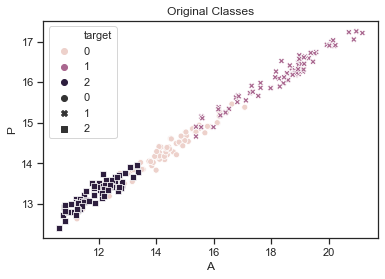

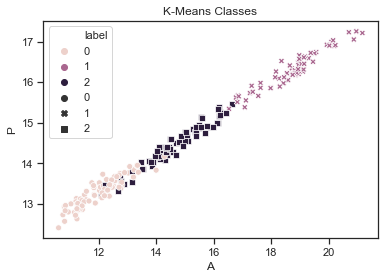

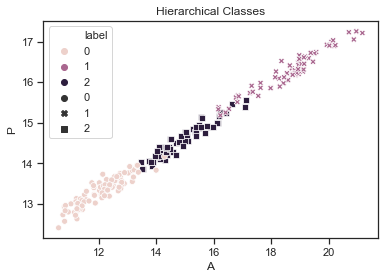

In [16]:
plt.title('Original Classes')
sns.scatterplot(x='A', y='P', hue='target', style='target', data=data)
plt.show()
plt.title('K-Means Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_k)
plt.show()
plt.title('Hierarchical Classes')
sns.scatterplot(x='A', y='P', hue='label', style='label', data=df_h)
plt.show()

In [17]:
print('Original Data Classes:')
print(data.target.value_counts())
print('-' * 30)
print('K-Means Predicted Data Classes:')
print(df_k.label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
2    70
1    70
0    70
Name: target, dtype: int64
------------------------------
K-Means Predicted Data Classes:
0    77
2    72
1    61
Name: label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    86
1    63
2    61
Name: label, dtype: int64


We can see our models' differences from the comparision of our algorithms' class counts.



## Build An Classification model :-

## K-Means

In [0]:
df_k.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,label
17,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,2
121,18.14,16.12,0.8772,6.059,3.563,3.619,6.011,1
112,19.13,16.31,0.9035,6.183,3.902,2.109,5.924,1
65,12.88,13.50,0.8879,5.139,3.119,2.352,4.607,2
19,12.72,13.57,0.8686,5.226,3.049,4.102,4.914,0


### Data Preparation( Splitting the Dependent/Target Variable and the Independent Variables )

In [0]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [0]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [0]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9795918367346939
Validation Accuracy  ::  0.9523809523809523


In [0]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.95      0.98        21
           2       1.00      0.90      0.95        20

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



## Random Forest

In [0]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)




Train Accuracy  ::  0.9931972789115646
Validation Accuracy  ::  0.9682539682539683


In [0]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [0]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.98        20

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



## KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [0]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [0]:
x_standardize = x.apply(zscore)

In [0]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [0]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [0]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [0]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[1 1 2 1 2 2 1 0 2 0 0 1 0 1 1 0 1 1 0 0 0 2 2 2 2 1 0 0 2 1 0 2 0 1 2 2 0
 1 2 1 0 0 1 0 1 1 1 1 2 0 2 2 0 2 1 0 1 1 2 1 0 2 0 2 0 2 2 2 2 0 0 1 1 0
 2 0 2 0 1 2 0 1 0 1 2 0 2 0 0 0 1 0 2 0 0 0 0 0 2 2 0 1 0 1 0 1 0 2 1 0 1
 2 2 2 0 2 1 0 2 0 2 0 2 2 1 2 0 2 1 0 2 0 1 2 1 1 1 2 0 0 1 1 0 2 2 0 0]
Train Accuracy  ::  0.9727891156462585


In [0]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1 0 1 2 0 2 1 2 2 0 2 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 2 0 1
 2 1 2 0 1 1 0 0 0 2 0 2 2 2 2 0 2 0 1 2 2 0 0 2 2 2]
Validation Accuracy  ::  0.9523809523809523


--------------------

## Agglomerative clustering

In [0]:
df_h.sample(5)

,A,P,C,LK,WK,A_Coef,LKG,label
181,12.46,13.41,0.8706,5.236,3.017,4.9870,5.147,0
99,18.72,16.34,0.8810,6.219,3.684,2.1880,6.097,1
36,16.20,15.27,0.8734,5.826,3.464,2.8230,5.527,2
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,0
130,18.30,15.89,0.9108,5.979,3.755,2.8370,5.962,1


In [0]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [0]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [0]:
from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
x_train = independent_scalar.fit_transform (x_train) #fit and transform
x_validate = independent_scalar.transform (x_validate) # only transform

## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier 
#DecisionTreeClassifier is the corresponding Classifier
Dtree = DecisionTreeClassifier(max_depth=3)
Dtree.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predictValues_train = Dtree.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)



predictValues_validate = Dtree.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)

print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  0.9795918367346939
Validation Accuracy  ::  0.9523809523809523


In [0]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.95      0.98        21
           2       1.00      0.90      0.95        20

    accuracy                           0.95        63
   macro avg       0.96      0.95      0.95        63
weighted avg       0.96      0.95      0.95        63



## Random Forest

In [0]:
RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)




Train Accuracy  ::  0.9931972789115646
Validation Accuracy  ::  0.9682539682539683


In [0]:
RFclassifier = RandomForestClassifier(n_estimators = 11, random_state = 0,min_samples_split=5,criterion='gini',max_depth=5)
RFclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predictValues_validate = RFclassifier.predict(x_validate)
#print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)



predictValues_train = RFclassifier.predict(x_train)
#print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)


print("Train Accuracy  :: ",accuracy_train)
print("Validation Accuracy  :: ",accuracy_validate)

Train Accuracy  ::  1.0
Validation Accuracy  ::  0.9841269841269841


In [0]:
print('Classification Report')
print(classification_report(y_validate, predictValues_validate))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.98        20

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



## KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [0]:
x= df_k.drop('label',axis=1)
y= df_k['label']

In [0]:
x_standardize = x.apply(zscore)

In [0]:
#KNN only takes array as input hence it is importanct to convert dataframe to array
x1 = np.array(x_standardize)
y1 = np.array(y)

In [0]:

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x1, y1, test_size=test_size, random_state=seed)

In [0]:
KNN = KNeighborsClassifier(n_neighbors= 8 , weights = 'uniform', metric='euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [0]:
predictValues_train = KNN.predict(x_train)
print(predictValues_train)
accuracy_train=accuracy_score(y_train, predictValues_train)
print("Train Accuracy  :: ",accuracy_train)

[1 1 2 1 2 2 1 0 2 0 0 1 0 1 1 0 1 1 0 0 0 2 2 2 2 1 0 0 2 1 0 2 0 1 2 2 0
 1 2 1 0 0 1 0 1 1 1 1 2 0 2 2 0 2 1 0 1 1 2 1 0 2 0 2 0 2 2 2 2 0 0 1 1 0
 2 0 2 0 1 2 0 1 0 1 2 0 2 0 0 0 1 0 2 0 0 0 0 0 2 2 0 1 0 1 0 1 0 2 1 0 1
 2 2 2 0 2 1 0 2 0 2 0 2 2 1 2 0 2 1 0 2 0 1 2 1 1 1 2 0 0 1 1 0 2 2 0 0]
Train Accuracy  ::  0.9727891156462585


In [0]:
predictValues_validate = KNN.predict(x_validate)
print(predictValues_validate)
accuracy_validate=accuracy_score(y_validate, predictValues_validate)
print("Validation Accuracy  :: ",accuracy_validate)

[1 0 1 2 0 2 1 2 2 0 2 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 2 0 1
 2 1 2 0 1 1 0 0 0 2 0 2 2 2 2 0 2 0 1 2 2 0 0 2 2 2]
Validation Accuracy  ::  0.9523809523809523


-------------------------

# ---------------------------------- HAPPY LEARNING ---------------------------------------------